In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
housing = pd.read_csv('./data/housing.csv')

In [4]:
X = housing.drop(columns='median_house_value')
y = housing.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='median_income', ylabel='population'>

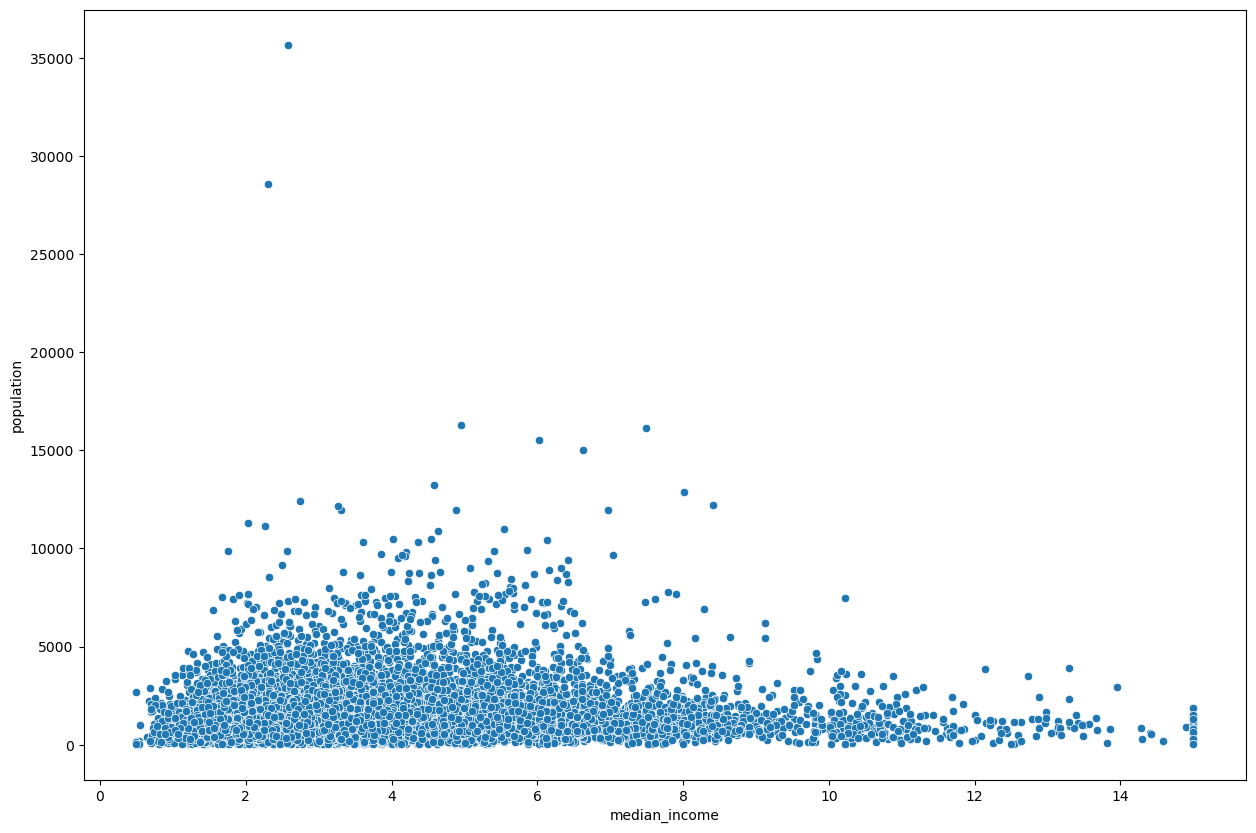

In [5]:
sns.scatterplot(data=housing, x='median_income', y='population')

### Feature scaling

* Features haben unterschiedliche Wertebereiche
  population: [0, 35000] vs median_income: [0, 15]
![scaling](./assets/scaling.png)
* Feature scaling bringt alle Features zusammen
* *Normalization* x -> [0, 1] $$x' = \frac{x-x_{min}}{x_{max} - x_{min}}$$
* *Standardization* x -> Standardnormalverteilt  $$x' = \frac{x-\mu}{\sigma}$$

Wichtig bei
* Algorithmen, die mit Distanzen arbeiten (SVM, ...)
* ANNs

In [6]:
transformer = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(strategy='mean'), ['total_bedrooms']),
    ('one_hot', OneHotEncoder(), ['ocean_proximity']),
], remainder='passthrough')

pipeline = Pipeline([
    ('column_transformer', transformer),
    ('scaler', RobustScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Biologisches Neuron

![Biological neuron](https://ib.bioninja.com.au/_Media/neuron_med.jpeg)

* Inputs in Form von elektrischen Signalen
* Input kommt über Dendriten
* Falls Summe der Inputs Schwelle(*Aktivierungspotential*) überschreitet, wird Signal weitergeleitet

## Künstliches Neuron(*Perceptron*)

![Artificial neuron](https://www.theprojectspot.com/images/post-assets/an.jpg)

* Inputs (x_i) sind die Features einer Observation
* Die Inputs werden verschieden gewichtet (w_i)
* Lernen => Gewichte adaptieren
* $$ output = f(\sum_i x_iw_i) = f(\vec{x}\vec{w}^T) $$

In [7]:
perceptron = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(units=1)
])
perceptron.build()

In [8]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-0.23928699],
        [ 0.25362825],
        [ 0.59739375],
        [-0.51610374],
        [-0.09824324],
        [ 0.34371853],
        [-0.34443602],
        [-0.16463706],
        [-0.04426974],
        [-0.28595194],
        [ 0.16821039],
        [ 0.09598207],
        [-0.31479675]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

### Training

* optimizer: wie wird auf Fehler reagiert
* loss: wie wird Fehler gemessen
* batch_size: observations, welche analysiert werden zwischen 2 weight-Anpassungen
* epochs: wie oft alle Trainingsdaten analysiert werden

In [15]:
perceptron.compile(optimizer='adam', loss='mse')

history = perceptron.fit(X_train, y_train,
                         validation_data=(X_test, y_test),
                         batch_size=32,
                         epochs=50,
                         verbose=1)

Epoch 1/50
516/516 [==============================] - 1s 1ms/step - loss: 56254480384.0000 - val_loss: 55292301312.0000
Epoch 2/50
516/516 [==============================] - 1s 1ms/step - loss: 56253657088.0000 - val_loss: 55291490304.0000
Epoch 3/50
516/516 [==============================] - 1s 1ms/step - loss: 56252801024.0000 - val_loss: 55290658816.0000
Epoch 4/50
516/516 [==============================] - ETA: 0s - loss: 56591511552.000 - 1s 1ms/step - loss: 56251969536.0000 - val_loss: 55289831424.0000
Epoch 5/50
516/516 [==============================] - 1s 1ms/step - loss: 56251092992.0000 - val_loss: 55289008128.0000
Epoch 6/50
516/516 [==============================] - 1s 1ms/step - loss: 56250269696.0000 - val_loss: 55288184832.0000
Epoch 7/50
516/516 [==============================] - 1s 1ms/step - loss: 56249405440.0000 - val_loss: 55287357440.0000
Epoch 8/50
516/516 [==============================] - 1s 1ms/step - loss: 56248578048.0000 - val_loss: 55286530048.0000
Epoch 

In [10]:
perceptron.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[ 20.39611  ],
        [ 25.398102 ],
        [ 25.213968 ],
        [  1.6330326],
        [ 22.412697 ],
        [ 23.184622 ],
        [-24.477661 ],
        [ 24.350056 ],
        [  3.1974118],
        [ 20.86475  ],
        [ 19.480043 ],
        [ 20.728003 ],
        [ 22.215025 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([25.676737], dtype=float32)>]

<AxesSubplot:>

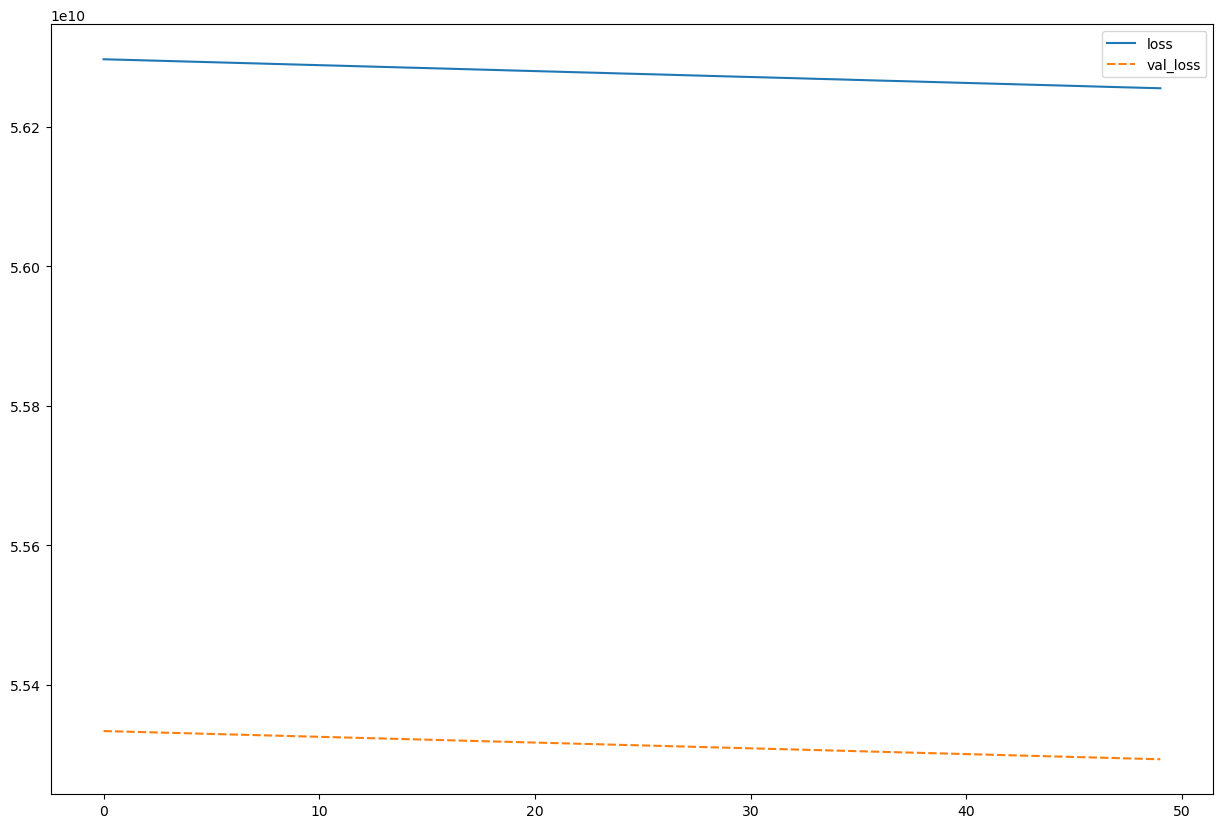

In [11]:
sns.lineplot(data=history.history)

## Mehr Neuronen!

In [16]:
ann = keras.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

Epoch 1/15
516/516 [==============================] - 1s 2ms/step - loss: 55405199360.0000 - val_loss: 51857346560.0000
Epoch 2/15
516/516 [==============================] - 1s 1ms/step - loss: 45275668480.0000 - val_loss: 35823726592.0000
Epoch 3/15
516/516 [==============================] - 1s 1ms/step - loss: 28001175552.0000 - val_loss: 20660488192.0000
Epoch 4/15
516/516 [==============================] - 1s 1ms/step - loss: 16465658880.0000 - val_loss: 12984480768.0000
Epoch 5/15
516/516 [==============================] - 1s 1ms/step - loss: 10979395584.0000 - val_loss: 9330581504.0000
Epoch 6/15
516/516 [==============================] - 1s 1ms/step - loss: 8244789248.0000 - val_loss: 7463629824.0000
Epoch 7/15
516/516 [==============================] - 1s 1ms/step - loss: 6842221056.0000 - val_loss: 6525416960.0000
Epoch 8/15
516/516 [==============================] - 1s 1ms/step - loss: 6119000064.0000 - val_loss: 6016776192.0000
Epoch 9/15
516/516 [===========================

<AxesSubplot:>

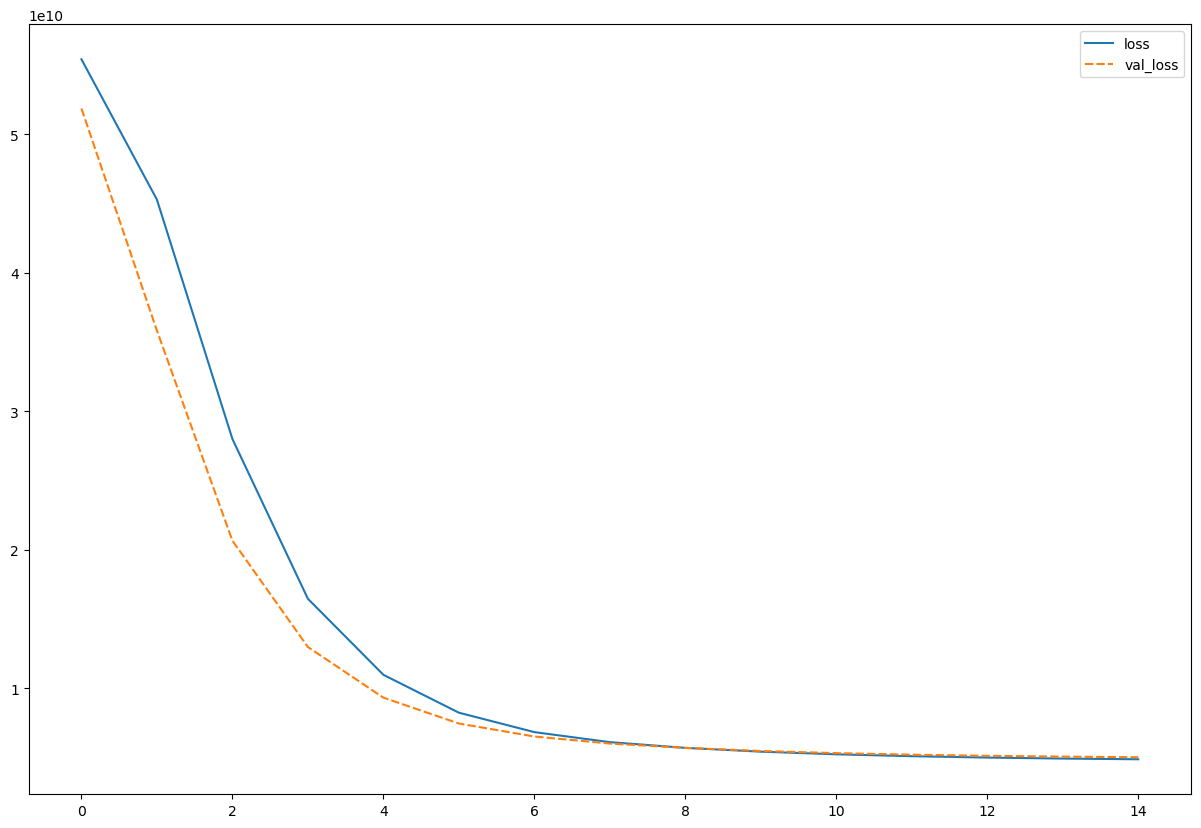

In [17]:
ann.compile(optimizer='adam', loss='mse')

history = ann.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  batch_size=32,
                  epochs=15)

sns.lineplot(data=history.history)

In [18]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=ann.predict(X_test)))

70920.74125744088